# Executive Summary 

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Cyclistics have set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. Since Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. In order to do that, the marketing analyst team need to extract user patterns from the historical bike trip data to assist the decision maker come up with the data-driven strategies.


## Dataset

The historical trip data covered the previous 12 months of Cyclistic trip data (202106-202205)

## Objective

To design marketing strategies aimed at converting casual riders to annual riders  

In [6]:
# get directory of files

import os 
dir_path = os.path.dirname(os.path.realpath('202107-divvy-tripdata.csv'))
cwd = os.getcwd()
cwd

'C:\\Users\\tony3\\Projects\\Case Study - bike sharing'

# Explore the data

In [7]:
# import exploratory files

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# read csv files 

bike_data1 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202106-divvy-tripdata.csv')
bike_data2 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202107-divvy-tripdata.csv')
bike_data3 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202108-divvy-tripdata.csv')
bike_data4 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202109-divvy-tripdata.csv')
bike_data5 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202110-divvy-tripdata.csv')
bike_data6 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202111-divvy-tripdata.csv')
bike_data7 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202112-divvy-tripdata.csv')
bike_data8 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202201-divvy-tripdata.csv')
bike_data9 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202202-divvy-tripdata.csv')
bike_data10 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202203-divvy-tripdata.csv')
bike_data11 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202204-divvy-tripdata.csv')
bike_data12 = pd.read_csv('C:/Users/tony3/Projects/Case Study - bike sharing/202205-divvy-tripdata.csv')

# merge the datasets into one single dataset 

bike_data_all = [bike_data1, bike_data2, bike_data3, bike_data4, bike_data5, bike_data6, bike_data7, bike_data8, bike_data9, bike_data10, bike_data11, bike_data12]
df = pd.concat(bike_data_all)


In [8]:
# information we can get from dataset 

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [9]:
# information about data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 634857
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 626.0+ MB


In [10]:
# number of unique values in each columns 
df.nunique()

ride_id               5860776
rideable_type               3
started_at            4896834
ended_at              4893478
start_station_name       1105
start_station_id         1063
end_station_name         1112
end_station_id           1068
start_lat              468846
start_lng              447530
end_lat                402338
end_lng                368930
member_casual               2
dtype: int64

In [11]:
# checking the missing values 
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    823167
start_station_id      823164
end_station_name      878338
end_station_id        878338
start_lat                  0
start_lng                  0
end_lat                 5036
end_lng                 5036
member_casual              0
dtype: int64

In [12]:
# showing for each column the percentage of null values
df.isnull().sum() / df.shape[0]

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    0.140454
start_station_id      0.140453
end_station_name      0.149867
end_station_id        0.149867
start_lat             0.000000
start_lng             0.000000
end_lat               0.000859
end_lng               0.000859
member_casual         0.000000
dtype: float64

In [13]:
# checking the shape of data
df.shape

(5860776, 13)

# Clean the data 

1. Remove the unwanted columns start_lat, start_lng, end_lat, end_lng, start_station_id, end_station_id, ride_id they are irrelevant to the analysis.

2. Change the column name rideable_type to bike_type, member_casual to customer_type
 
3. change the data type started_at and ended_at column to datetime 

4. fill missing start_station_name and end_station_name with 'unknown'

5. increase column name ride_length (mins) 

6. drop the data when ride_length < 0 , since it might cause by the system flaw. Those data points might skew our analysis

7. drop the data when ride_length < 1 , since it might not be the real renting situation, the user might change their mind and return the bike right after they rent it

In [14]:
# dropping the unwanted columns 

df_1 = df[['rideable_type','started_at','ended_at','start_station_name','end_station_name','member_casual']].copy()
df_1.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,member
1,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,member
2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,member
3,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,member
4,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,member


In [15]:
# changing column names 

df_1 = df_1.rename(columns={'rideable_type':'bike_type','member_casual':'customer_type'})

In [16]:
# changing the column type 

df_1['started_at'] = pd.to_datetime(df_1['started_at'])
df_1['ended_at'] = pd.to_datetime(df_1['ended_at'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 634857
Data columns (total 6 columns):
 #   Column              Dtype         
---  ------              -----         
 0   bike_type           object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   customer_type       object        
dtypes: datetime64[ns](2), object(4)
memory usage: 313.0+ MB


In [17]:
# filling NaN station name with unknown

df_1 = df_1.fillna('Unknown')

# checking missing values 

df_1.isnull().sum()

bike_type             0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
customer_type         0
dtype: int64

In [18]:
# checking the number of start_station_name and end_station_name unique values 

df_1.nunique()

bike_type                   3
started_at            4896834
ended_at              4893478
start_station_name       1106
end_station_name         1113
customer_type               2
dtype: int64

In [19]:
# increase column ride_length and find the max, min, mean, median

df_1['ride_length'] =   (df_1['ended_at']- df_1['started_at']).astype('timedelta64[s]')/60

print('Min ride_length : ', df_1['ride_length'].min())
print('Max ride_length : ', df_1['ride_length'].max())
print('Avg ride_length : ', df_1['ride_length'].mean())
print('Median ride_length : ', df_1['ride_length'].median())


Min ride_length :  -58.03333333333333
Max ride_length :  55944.15
Avg ride_length :  20.68927221127968
Median ride_length :  11.333333333333334


In [20]:
# dropping the data with ride_length less than 0 

df_1 = df_1[df_1['ride_length'] > 0 ]


In [21]:
# keep searching for outliers 

Q1 = df_1['ride_length'].quantile(0.25)
Q3 = df_1['ride_length'].quantile(0.75)

IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print('data points greater than upper_bound : \n' , df_1[(df_1['ride_length'] > (upper_bound))].count())

print('data points lower than lower_bound : \n' , df_1[(df_1['ride_length'] < (lower_bound))].count())
            

data points greater than upper_bound : 
 bike_type             429698
started_at            429698
ended_at              429698
start_station_name    429698
end_station_name      429698
customer_type         429698
ride_length           429698
dtype: int64
data points lower than lower_bound : 
 bike_type             0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
customer_type         0
ride_length           0
dtype: int64


In [22]:
# move outliers to a different dataframe 

outliers = df_1[df_1['ride_length'] > upper_bound].copy()

df_1 = df_1[df_1['ride_length'] < upper_bound].sort_values(by='started_at')
df_1.head()

,bike_type,started_at,ended_at,start_station_name,end_station_name,customer_type,ride_length
116066,docked_bike,2021-06-01 00:00:38,2021-06-01 00:41:34,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,casual,40.933333
718898,electric_bike,2021-06-01 00:00:41,2021-06-01 00:20:21,Unknown,Unknown,member,19.666667
143797,electric_bike,2021-06-01 00:01:00,2021-06-01 00:08:19,Perry Ave & 69th St,May St & 69th St,casual,7.316667
407743,electric_bike,2021-06-01 00:02:12,2021-06-01 00:06:22,Unknown,Unknown,casual,4.166667
32112,electric_bike,2021-06-01 00:03:57,2021-06-01 00:44:44,Bradley Park,Stony Island Ave & South Chicago Ave,casual,40.783333


In [23]:
# reset indexes 

df_1 = df_1.reset_index(drop=True)
df_1.head()

,bike_type,started_at,ended_at,start_station_name,end_station_name,customer_type,ride_length
0,docked_bike,2021-06-01 00:00:38,2021-06-01 00:41:34,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,casual,40.933333
1,electric_bike,2021-06-01 00:00:41,2021-06-01 00:20:21,Unknown,Unknown,member,19.666667
2,electric_bike,2021-06-01 00:01:00,2021-06-01 00:08:19,Perry Ave & 69th St,May St & 69th St,casual,7.316667
3,electric_bike,2021-06-01 00:02:12,2021-06-01 00:06:22,Unknown,Unknown,casual,4.166667
4,electric_bike,2021-06-01 00:03:57,2021-06-01 00:44:44,Bradley Park,Stony Island Ave & South Chicago Ave,casual,40.783333


In [24]:
# find the ride length less than 1 min 

less_than_1 = df_1.loc[(df_1['start_station_name'] == df_1['end_station_name']) & (df_1['ride_length'] < 1)].copy()

# drop those rows 

temp = less_than_1.index.to_list()
df_1 = df_1.drop(temp)
df_1.head()

,bike_type,started_at,ended_at,start_station_name,end_station_name,customer_type,ride_length
0,docked_bike,2021-06-01 00:00:38,2021-06-01 00:41:34,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,casual,40.933333
1,electric_bike,2021-06-01 00:00:41,2021-06-01 00:20:21,Unknown,Unknown,member,19.666667
2,electric_bike,2021-06-01 00:01:00,2021-06-01 00:08:19,Perry Ave & 69th St,May St & 69th St,casual,7.316667
3,electric_bike,2021-06-01 00:02:12,2021-06-01 00:06:22,Unknown,Unknown,casual,4.166667
4,electric_bike,2021-06-01 00:03:57,2021-06-01 00:44:44,Bradley Park,Stony Island Ave & South Chicago Ave,casual,40.783333


In [25]:
# copy cleaned data to a new dataset 

df_cleaned = df_1.reset_index(drop=True).copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345301 entries, 0 to 5345300
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   bike_type           object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   customer_type       object        
 6   ride_length         float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 285.5+ MB


# Start to analyze the dataset  

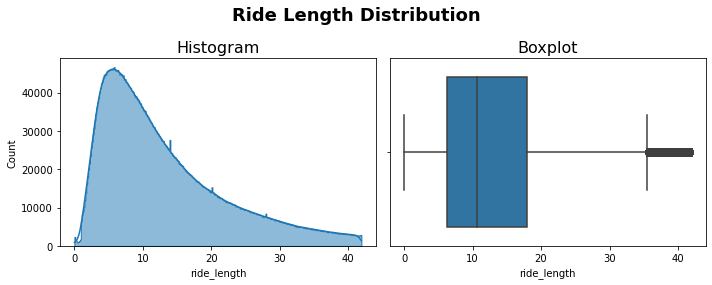

In [26]:
# visualized the ride_length distribution on different customer_type

fig, axs = plt.subplots(1,2, figsize= (10,4))
sns.histplot(df_cleaned['ride_length'], kde = True, element='step',ax = axs[0])
sns.boxplot(x= df_cleaned['ride_length'], ax = axs[1])
axs[0].set_title('Histogram', fontsize = 16)
axs[1].set_title('Boxplot', fontsize = 16)
plt.suptitle('Ride Length Distribution', fontsize= 18 , fontweight='bold')
plt.tight_layout()
plt.show()

## Question 1 :What is the weekly average of ride length for casual riders and members?

In [27]:
# What is the weekly average of ride length for casual riders and members? 
# first we group the required column and period of time by started_at and find the mean 
# reset the index

weekly_rides = df_cleaned.groupby([pd.Grouper(key = 'started_at', freq= '1W'), 'customer_type'])['ride_length'].mean()
weekly_rides = weekly_rides.reset_index()
weekly_rides.head()

,started_at,customer_type,ride_length
0,2021-06-06,casual,17.282201
1,2021-06-06,member,13.286568
2,2021-06-13,casual,16.945131
3,2021-06-13,member,13.163270
4,2021-06-20,casual,16.821534


In [34]:
# rename ride_length to avg_ride_length, since the columns have been changed
weekly_rides.rename(columns={'ride_length':'avg_ride_length'})



,started_at,customer_type,avg_ride_length
0,2021-06-06,casual,17.282201
1,2021-06-06,member,13.286568
2,2021-06-13,casual,16.945131
3,2021-06-13,member,13.163270
4,2021-06-20,casual,16.821534
...,...,...,...
101,2022-05-22,member,11.851801
102,2022-05-29,casual,15.692180
103,2022-05-29,member,11.888160
104,2022-06-05,casual,16.210271


In [29]:
# group weekly_rides dataframe by customer_type and aggregate ride_length using mean()

avg_weekly_rides = weekly_rides.groupby('customer_type')['ride_length'].mean()
avg_weekly_rides

customer_type
casual    14.638630
member    11.139624
Name: ride_length, dtype: float64

C:\Users\tony3\AppData\Local\Temp/ipykernel_9384/85858208.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


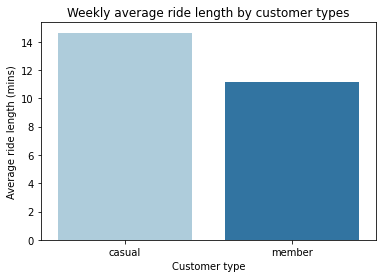

In [30]:
# visualize dataset 

sns.set_palette('Paired')
fig, ax = plt.subplots()
sns.barplot(x= avg_weekly_rides.index, y= avg_weekly_rides)
ax.set_title('Weekly average ride length by customer types')
ax.set_xlabel('Customer type')
ax.set_ylabel('Average ride length (mins)')
fig.show()

## Question 2 :What is the proportion of different bike service being used by docked_bike, electric_bike,classic_bike for casual riders and members? 

In [36]:
all_casual = df_cleaned[casual]['bike_type'].value_counts().sum()
all_member = df_cleaned[member]['bike_type'].value_counts().sum()

casual = df_cleaned['customer_type'] == 'casual'
casual_prop = df_cleaned[casual]['bike_type'].value_counts() / all_casual
print("proportion of bike service being used for casual user :\n" , casual_prop)

member = df_cleaned['customer_type'] == 'member'
member_prop = df_cleaned[member]['bike_type'].value_counts() / all_member
print("proportion of bike service being used for member user :\n" , member_prop)


NameError: name 'casual' is not defined

NameError: name 'casual_prop' is not defined

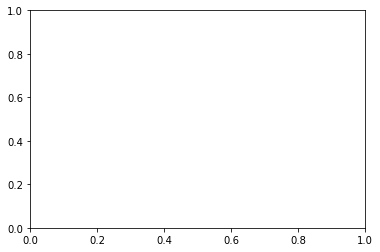

In [35]:
# visualize the proportion of different bike service being used
# barplot for casual user 
sns.set_palette('flare')
fig, ax = plt.subplots()
sns.barplot(x= casual_prop.index, y= casual_prop)
ax.set_title('Casual user')
ax.set_xlabel('Customer type')
ax.set_ylabel('Proportion of bike service being used')

# barplot for member user
sns.set_palette('flare')
fig, ax = plt.subplots()
sns.barplot(x= member_prop.index, y= member_prop)
ax.set_title('Member user')
ax.set_xlabel('Customer type')
ax.set_ylabel('Proportion of bike service being used')
fig.show()

## Question 3 :Is there a correlation between seasons and number of riders? 

In [ ]:
# group data daily by customer_type
daily_rides_count = df_cleaned.groupby([pd.Grouper(key = 'started_at', freq= '1D'), 'customer_type'])['ride_length'].count().reset_index()

# rename 'ride_length' column name
daily_rides_count = daily_rides_count.rename(columns={'ride_length':'daily_num_rides'})

# define function to detect season 

def season_recognition(month):
    if month == 1 or month == 2 or month == 12:
        season = 'Winter'
    elif month == 3 or month == 4 or month == 5:
        season = 'Spring'
    elif month == 6 or month == 7 or month == 8:
        season = 'Summer'
    elif month == 9 or month == 10 or month == 11:
        season = 'Autumn'
    return season 

# add columns
daily_rides_count['month'] = daily_rides_count['started_at'].dt.month

season_list = []
for month in daily_rides_count['month']:
    season_list.append(season_recognition(month))

daily_rides_count['season'] = season_list




In [ ]:
# add season representation 1 = winter 2 = spring 3 = summer 4 = autumn

daily_rides_count['season_rep'] = daily_rides_count['started_at'].dt.month%12//3+1
daily_rides_count.head()

In [ ]:
# visualize data 

fig2, ax2 = plt.subplots()
fig2.set_size_inches(7, 5)
sns.scatterplot(x= 'started_at', y= 'daily_num_rides', data=daily_rides_count, hue='season', palette='flare')
ax2.set_title('daily number of rides')
ax2.set_xlabel('date')
ax2.set_ylabel('')
ax2.legend(frameon= False)
fig2.show()

In [ ]:
# find correlation between seasons and number of rides 

cor = daily_rides_count['daily_num_rides'].corr(daily_rides_count['season_rep'])
print(' correlation between daily number of rides and seasons : ' , round(cor,3))


## Question 4 :Is there a correlation between the seasons and ride length?

In [ ]:
# group the data by days and ride_length
daily_ride_length = df_cleaned.groupby([pd.Grouper(key = 'started_at', freq= '1D'), 'customer_type'])['ride_length'].mean().reset_index()
# rename the column 
daily_ride_length = daily_ride_length.rename(columns={'ride_length': 'avg_daily_ride_length'})

# add columns
daily_ride_length['month'] = daily_ride_length['started_at'].dt.month

season_list = []
for month in daily_ride_length['month']:
    season_list.append(season_recognition(month))

daily_ride_length['season'] = season_list

# add season representation 1 = winter 2 = spring 3 = summer 4 = autumn

daily_ride_length['season_rep'] = daily_ride_length['started_at'].dt.month%12//3+1
daily_ride_length.head()


In [ ]:
# visualize data 
fig3, ax3 = plt.subplots()
fig3.set_size_inches(7, 5)
sns.scatterplot(x= 'started_at', y= 'avg_daily_ride_length', data=daily_ride_length, hue='season', palette='flare')
ax3.set_title('average daily ride length')
ax3.set_xlabel('date')
ax3.set_ylabel('')
ax3.legend(frameon= False)
fig3.show()


In [ ]:
# find correlation between seasons and daily_ride_length

cor = daily_ride_length['avg_daily_ride_length'].corr(daily_rides_count['season_rep'])
print(' correlation between daily ride length and seasons : ' , round(cor,3))



## Question 5:What is the average number of rides on each name of the day of the week?

In [ ]:
# create a new column with the day of the week from Mon to Sun

daily_rides_count['day_of_week'] = daily_rides_count['started_at'].dt.day_name()
daily_rides_count['day'] = daily_rides_count['started_at'].dt.dayofweek.astype(int)

daily_rides_count.head()

In [ ]:
# group data by season, day of week, day

day_rides = daily_rides_count.groupby(['season','day_of_week', 'day'])['daily_num_rides'].mean().reset_index() 

day_rides = day_rides.sort_values(by='day')

day_rides.head()

In [ ]:
# visualize data 

fig4, ax4 = plt.subplots()
fig4.set_size_inches(7, 5)
sns.lineplot(x= 'day_of_week', y= 'daily_num_rides', data= day_rides, hue='season', palette='flare')
ax4.set_title('average weekly number of rides')
ax4.set_xlabel('week of day')
ax4.set_ylabel('')
ax4.legend(frameon= False)
fig4.show()


## Question 6:What is the average ride length on each name of the day of the week?

In [ ]:
# create a new column with weeks 

daily_ride_length['day_of_week'] = daily_ride_length['started_at'].dt.day_name()
daily_ride_length['day'] = daily_ride_length['started_at'].dt.dayofweek.astype(int)

daily_ride_length.head()

In [ ]:
# group data by season, day of week, day

day_ride_length = daily_ride_length.groupby(['season','day_of_week','day'])['avg_daily_ride_length'].mean().reset_index()

day_ride_length = day_ride_length.sort_values(by='day')
day_ride_length.head()

In [ ]:
# visualize data

fig5, ax5 = plt.subplots()
fig5.set_size_inches(7, 5)
sns.lineplot(x= 'day_of_week', y= 'avg_daily_ride_length', data= day_ride_length, hue='season', palette='pastel')
ax5.set_title('average weekday ride length')
ax5.set_xlabel('week of day')
ax5.set_ylabel('')
ax5.legend(frameon= False)
fig5.show()

## Question 7:Which stations do casual riders often visit?

In [ ]:
# group data by start_station_name

start_station = df_cleaned.groupby(['start_station_name','customer_type'])['ride_length'].count().reset_index()
start_station = start_station.rename(columns={'ride_length':'number_of_visits'})

start_station = start_station[(start_station['customer_type'] == 'casual') & (start_station['start_station_name'] != 'Unknown' )].sort_values(by='number_of_visits', ascending=False) 

start_station = start_station.head()





In [ ]:
# group data by the end_station_name

end_station = df_cleaned.groupby(['end_station_name','customer_type'])['ride_length'].count().reset_index()
end_station = end_station.rename(columns={'ride_length':'number_of_visits'})

end_station = end_station[(end_station['customer_type'] == 'casual') & (end_station['end_station_name'] != 'Unknown' )].sort_values(by='number_of_visits', ascending=False) 

end_station = end_station.head()

# Conclusion

According to our findings from the 7 questiones we had analysed, we demonstrate the results as follows,

1. What is the weekly average of ride length for casual riders and members?
<br>Casual riders have longer weekly ride length with an average of 14.64 minutes, on the other hand, member riders have an average of 11.14 minutes.  
***
2. What is the proportion of different bike service being used by docked_bike, electric_bike,classic_bike for casual riders and members?
<br>For casual riders the percentage of bike services are 0.48/0.43/0.9 (follow the order by classic_bike/electric_bike/docked_bike)
***
3. Is there a correlation between seasons and number of riders?
<br>There is a strong correlation (0.58) between seasons and number of riders.
***
4. Is there a correlation between the seasons and ride length?
<br>There is a weak correlation (0.28) between seasons and ride length
***
5. What is the average number of rides on each name of the day of the week?
<br>In spring, summer, and autumn, the number of rides gradually increases from Friday and peak on Saturday, on the other hand, in Winter, the number of rides remains steady throughout the weekday but drops on weekend.
***
6. What is the average ride length on each name of the day of the week?
<br>The ride length gradually increases from Thursday and reachs peak on Sunday in four seasons. 
***
7. Which stations do casual riders often visit?
<br>Recreational stations are the most popular stops for both start and end stations.




# Recommendation

1. To place the discount advertising mostly on the recreational stations by which operates with classic bikes and electronic bikes.  
***
2. To offer seasonal discounts for new members, for example, summer special offer. 
***
3. To host the promotional compaigns mostly on weekend, for example, sending the marketing information with notification by apps. 
***
4. To offer sales promotion with cooperated shops nearby popular recreational stations to potential customers applying for new members in particular period of time. 
